In [1]:
# import sys
# print(sys.executable)
# print(sys.version)

import os
os.environ['PROJ_LIB'] = '/home/jlee/.conda/envs/mmc_sgp/share/proj'

import wrf
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd

wrf_runs_dir = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/'
nb_dir = !pwd
data_dir_df = pd.read_csv(nb_dir[0]+'/data-dir-j3leswrf.csv', index_col=0)

In [3]:
def plot_c1contour(file, wrf_var, wrf_run):

    wrf_single = Dataset(file, 'r')
#     print(wrf_single)

    var = wrf.getvar(wrf_single, wrf_var, timeidx=wrf.ALL_TIMES)
#     print(var.shape)
#     print(len(var))

    if len(var.dims) > 2: 
        # 1st time step
        var_1time = var[0, :, :]
    else: 
        var_1time = var
    
    if 'bottom_top' in var_1time.dims: 
        var_1time = var_1time[0, :, :]

    lats, lons = wrf.latlon_coords(var)

    bm = wrf.get_basemap(var_1time)

    fig = plt.figure(figsize=(12, 9))

    # bm.drawcoastlines(linewidth=0.25)
    bm.drawstates(linewidth=0.25)
    bm.drawcountries(linewidth=0.25)

    bm.drawparallels(np.arange(36, 37, 0.05), labels=[1, 0, 0, 0])
    bm.drawmeridians(np.arange(-98, -97, 0.05), labels=[0, 0, 0, 1])

    x, y = bm(wrf.to_np(lons), wrf.to_np(lats))

    # bm.contour(x, y, wrf.to_np(var), 10, colors="black")
    bm.contourf(x, y, wrf.to_np(var_1time), 10, cmap=get_cmap('viridis'))

    clb = plt.colorbar(shrink=0.9)
    clb.ax.set_title(var.units, pad=12)

    c1x, c1y = bm(wrf.to_np(-97.487643), wrf.to_np(36.607322))
    bm.scatter(c1x, c1y, s=200, marker='x', color='k', linewidth=4)

    c1x, c1y = bm(wrf.to_np(-97.4905), wrf.to_np(36.6115))
    plt.annotate('C1', xy=(c1x, c1y), size=15)

    plt.title(wrf_run+'\n'+var_1time.description+' @ '+str(pd.Timestamp(var_1time['Time'].values)))

    plt.show()

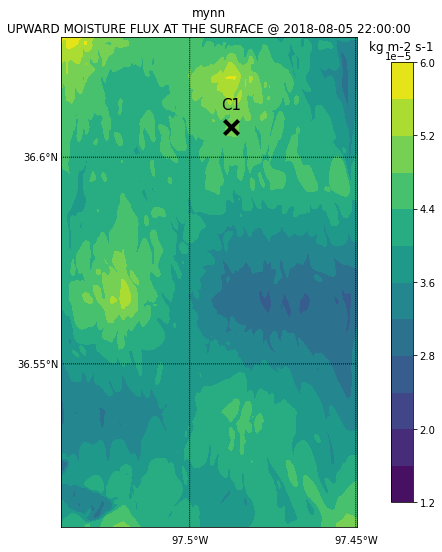

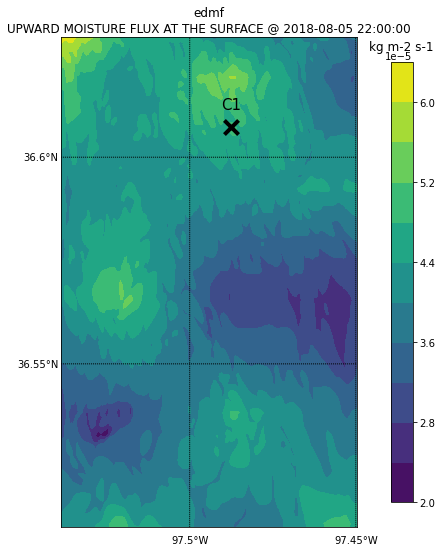

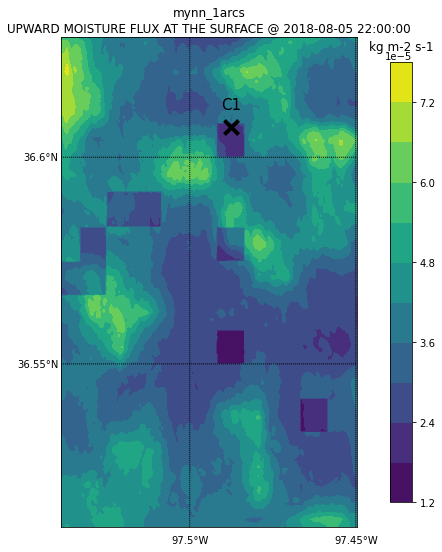

In [31]:
eval_date = '2018-08-05'
hr = 22
for row in ['mynn', 'edmf', 'mynn_1arcs']: 
    date_col = data_dir_df[eval_date]
    file = wrf_runs_dir+date_col[row]+'/wrfout_d04_'+eval_date+'_'+str(hr)+':00:00'
    plot_c1contour(file, 'QFX', row)
    # CLDFRAC2D

In [11]:
hr = 22
for row in ['mynn', 'edmf', 'mynn_1arcs']: 
    date_col = data_dir_df[eval_date]
    file = wrf_runs_dir+date_col[row]+'/wrfout_d04_'+eval_date+'_'+str(hr)+':00:00'
    plot_c1contour(file, 'VEGFRA', row)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    TITLE:  OUTPUT FROM WRF V4.2.1 MODEL
    START_DATE: 2018-08-05_15:00:00
    SIMULATION_START_DATE: 2018-08-04_12:00:00
    WEST-EAST_GRID_DIMENSION: 201
    SOUTH-NORTH_GRID_DIMENSION: 331
    BOTTOM-TOP_GRID_DIMENSION: 109
    DX: 40.0
    DY: 40.0
    AERCU_OPT: 0
    AERCU_FCT: 1.0
    IDEAL_CASE: 0
    DIFF_6TH_SLOPEOPT: 0
    AUTO_LEVELS_OPT: 2
    DIFF_6TH_THRESH: 0.1
    DZBOT: 50.0
    DZSTRETCH_S: 1.3
    DZSTRETCH_U: 1.1
    SKEBS_ON: 0
    SPEC_BDY_FINAL_MU: 1
    USE_Q_DIABATIC: 0
    GRIDTYPE: C
    DIFF_OPT: 2
    KM_OPT: 2
    DAMP_OPT: 3
    DAMPCOEF: 0.2
    KHDIF: 0.0
    KVDIF: 0.0
    MP_PHYSICS: 28
    RA_LW_PHYSICS: 4
    RA_SW_PHYSICS: 4
    SF_SFCLAY_PHYSICS: 5
    SF_SURFACE_PHYSICS: 2
    BL_PBL_PHYSICS: 0
    CU_PHYSICS: 0
    SF_LAKE_PHYSICS: 0
    USE_BATHYMETRY: 0
    SURFACE_INPUT_SOURCE: 3
    SST_UPDATE: 0
    GRID_FDDA: 0
    GFDDA_INTERVAL_M: 0
 

ValueError: 'VEGFRA' is not a valid variable name

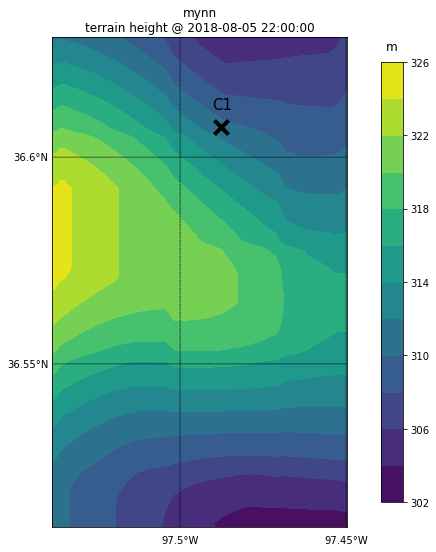

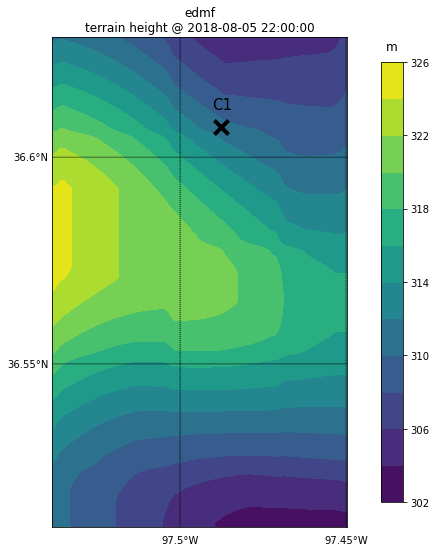

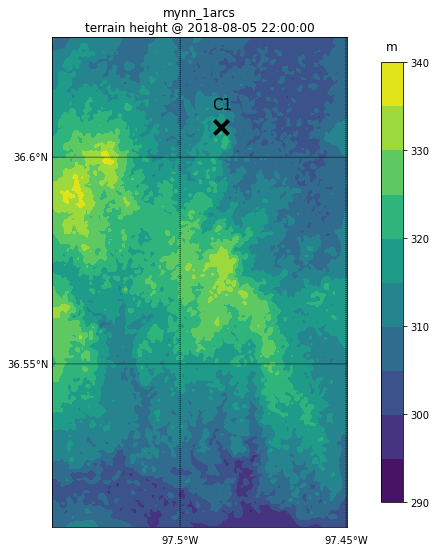

In [6]:
hr = 22
for row in ['mynn', 'edmf', 'mynn_1arcs']: 
    date_col = data_dir_df[eval_date]
    file = wrf_runs_dir+date_col[row]+'/auxout/mmc_d04_'+eval_date+'_'+str(hr)+':00:00'
    plot_c1contour(file, 'ter', row)

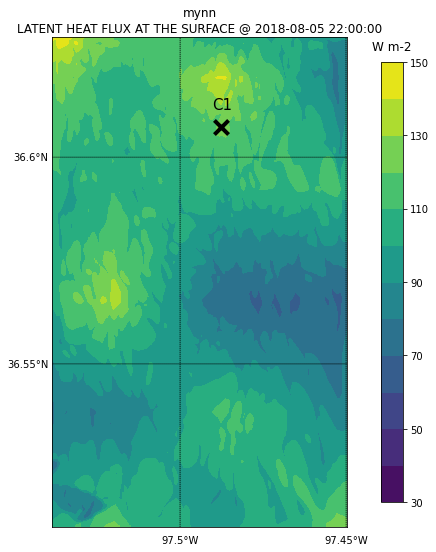

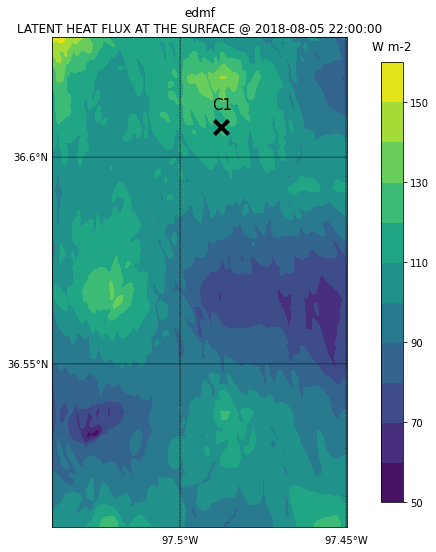

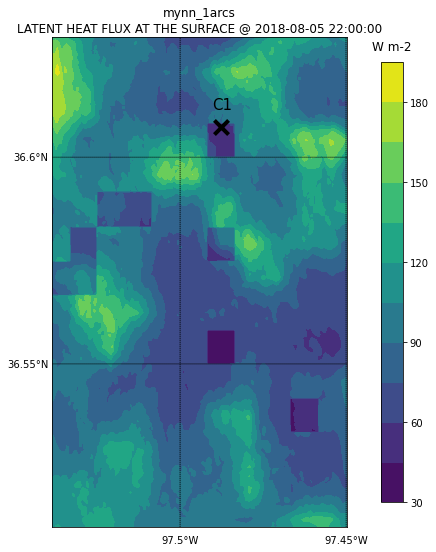

In [7]:
hr = 22
for row in ['mynn', 'edmf', 'mynn_1arcs']: 
    date_col = data_dir_df[eval_date]
    file = wrf_runs_dir+date_col[row]+'/auxout/mmc_d04_'+eval_date+'_'+str(hr)+':00:00'
    plot_c1contour(file, 'LH', row)

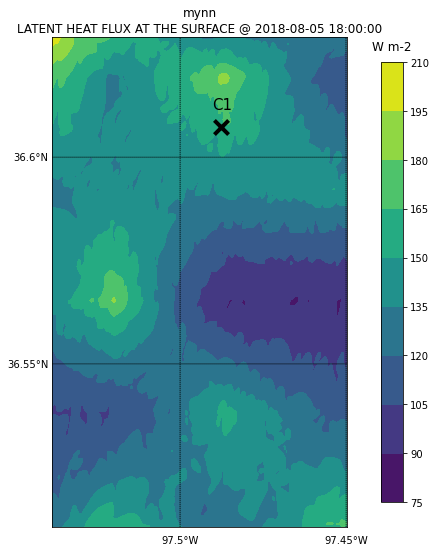

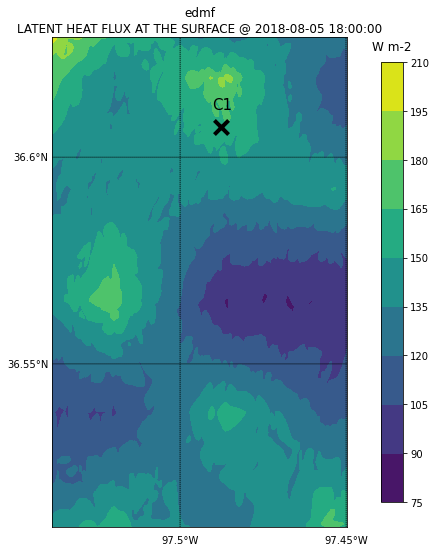

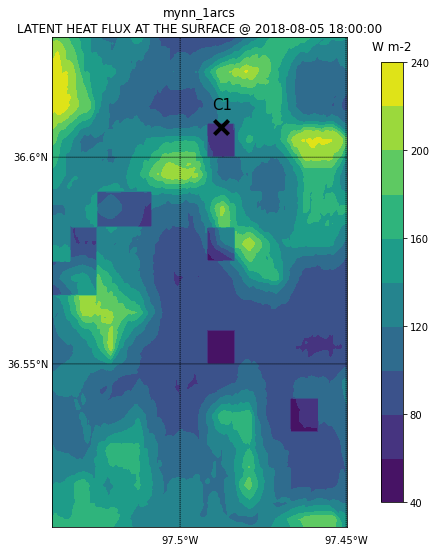

In [71]:
hr = 18
for row in ['mynn', 'edmf', 'mynn_1arcs']: 
    date_col = data_dir_df[eval_date]
    file = wrf_runs_dir+date_col[row]+'/auxout/mmc_d04_'+eval_date+'_'+str(hr)+':00:00'
    plot_c1contour(file, 'LH', row)

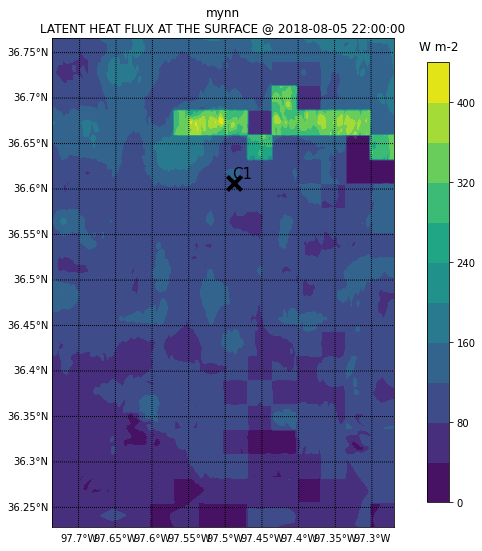

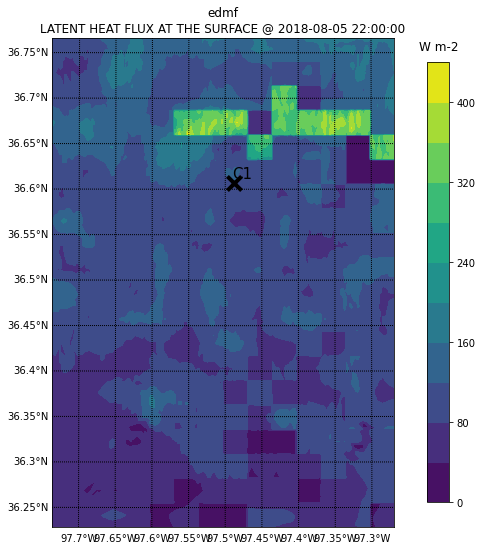

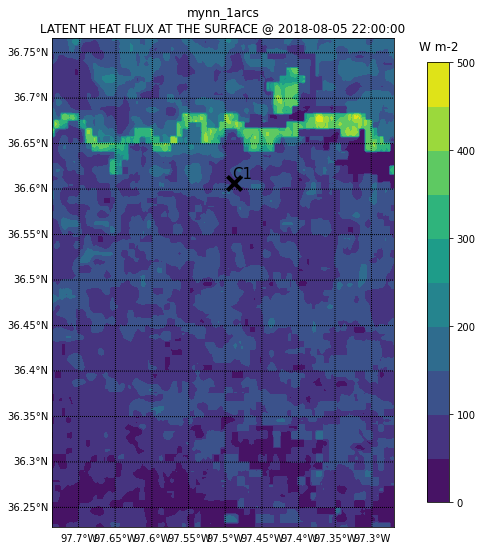

In [69]:
hr = 22
for row in ['mynn', 'edmf', 'mynn_1arcs']: 
    date_col = data_dir_df[eval_date]
    file = wrf_runs_dir+date_col[row]+'/auxout/mmc_d03_'+eval_date+'_'+str(hr)+':00:00'
    plot_c1contour(file, 'LH', row)

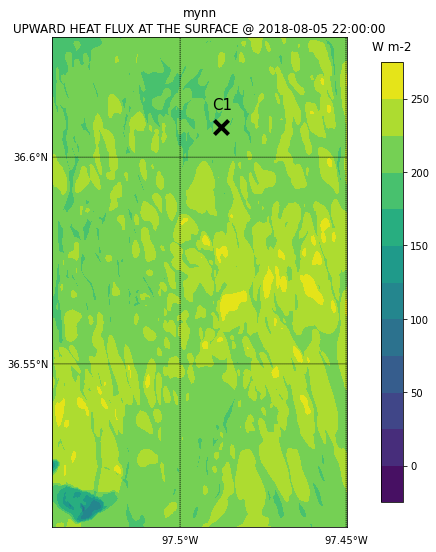

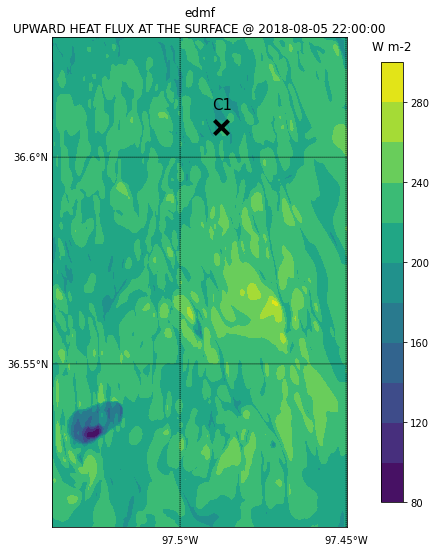

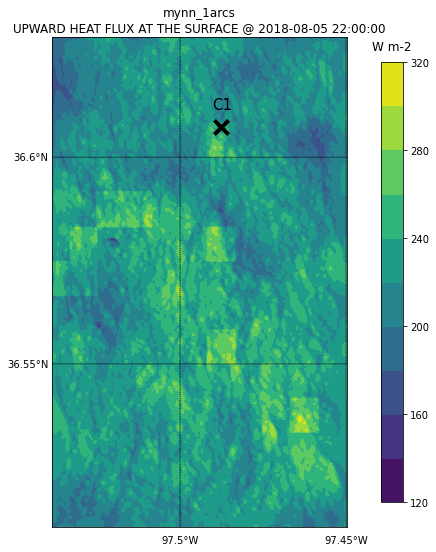

In [8]:
hr = 22
for row in ['mynn', 'edmf', 'mynn_1arcs']: 
    date_col = data_dir_df[eval_date]
    file = wrf_runs_dir+date_col[row]+'/auxout/mmc_d04_'+eval_date+'_'+str(hr)+':00:00'
    plot_c1contour(file, 'HFX', row)

In [67]:
def plot_c1contour_wswd1height(file, wrf_var, wrf_run, hgt_ind):

    wrf_single = Dataset(file, 'r')
    
    hgt = wrf.getvar(wrf_single, 'height_agl', timeidx=wrf.ALL_TIMES)
    hgt_avg = hgt[0, :, :, :].mean(dim=['south_north', 'west_east'])[hgt_ind]

    var = wrf.getvar(wrf_single, 'wspd_wdir', timeidx=wrf.ALL_TIMES)
    
    var = var['wspd_wdir' == wrf_var]
    var_1time = var[0, hgt_ind, :, :]

    lats, lons = wrf.latlon_coords(var)

    bm = wrf.get_basemap(var_1time)

    fig = plt.figure(figsize=(12, 9))

    # bm.drawcoastlines(linewidth=0.25)
    bm.drawstates(linewidth=0.25)
    bm.drawcountries(linewidth=0.25)

    bm.drawparallels(np.arange(36, 37, 0.05), labels=[1, 0, 0, 0])
    bm.drawmeridians(np.arange(-98, -97, 0.05), labels=[0, 0, 0, 1])

    x, y = bm(wrf.to_np(lons), wrf.to_np(lats))

    # bm.contour(x, y, wrf.to_np(var), 10, colors="black")
    bm.contourf(x, y, wrf.to_np(var_1time), 10, cmap=get_cmap('viridis'))

    clb = plt.colorbar(shrink=0.9)
    clb.ax.set_title(var.units, pad=12)

    c1x, c1y = bm(wrf.to_np(-97.487643), wrf.to_np(36.607322))
    bm.scatter(c1x, c1y, s=200, marker='x', color='k', linewidth=4)

    c1x, c1y = bm(wrf.to_np(-97.4905), wrf.to_np(36.6115))
    plt.annotate('C1', xy=(c1x, c1y), size=15)

    plt.title(wrf_run+': '+wrf_var+'\n'+str(pd.Timestamp(var_1time['Time'].values))
              +' @ '+str(np.round(hgt_avg.values, 1))+' m agl')

    plt.show()

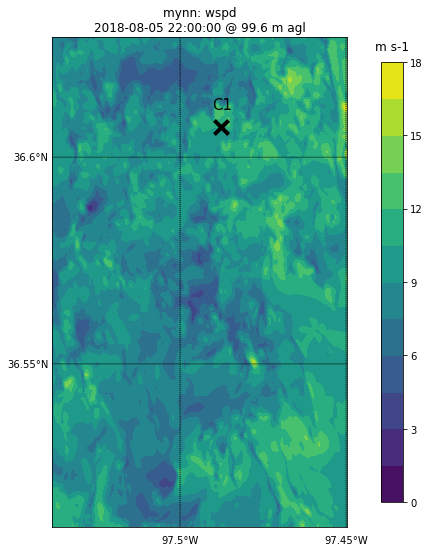

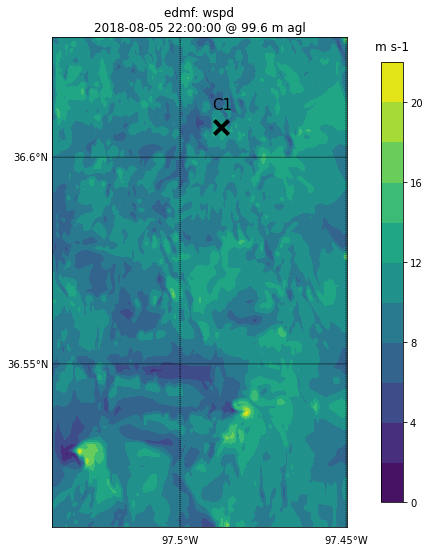

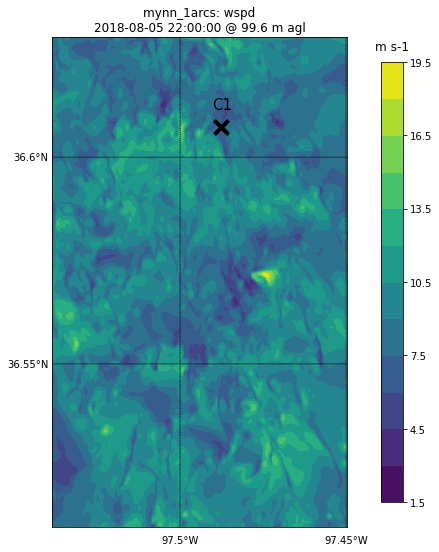

In [68]:
hr = 22
for row in ['mynn', 'edmf', 'mynn_1arcs']: 
    date_col = data_dir_df[eval_date]
    file = wrf_runs_dir+date_col[row]+'/auxout/mmc_d04_'+eval_date+'_'+str(hr)+':00:00'
    plot_c1contour_wswd1height(file, 'wspd', row, 20)

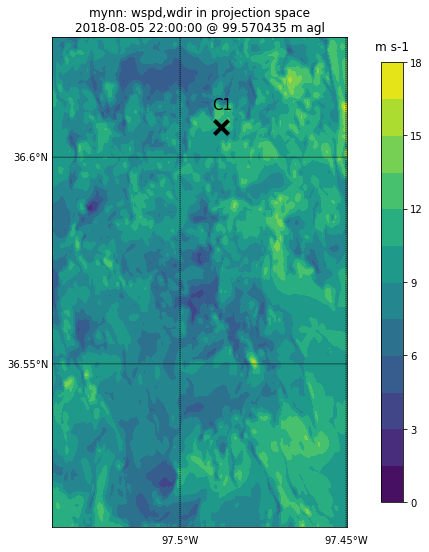

In [59]:
file = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/l1_0805m/auxout/'+'mmc_d04_2018-08-05_22:00:00'
plot_c1contour_wswd1height(file, 'mynn', 20)

In [78]:
# file = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/l1_0805m/auxout/'+'mmc_d04_2018-08-05_22:00:00'
# file = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/l1_0805m/'+'wrfout_d04_2018-08-05_22:00:00'
file = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/l5_0805m/'+'wrfinput_d04'
wrf_single = Dataset(file, 'r')

In [82]:
wrf_single

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    TITLE:  OUTPUT FROM REAL_EM V4.2.1 PREPROCESSOR
    START_DATE: 2018-08-05_15:00:00
    SIMULATION_START_DATE: 2018-08-05_15:00:00
    WEST-EAST_GRID_DIMENSION: 201
    SOUTH-NORTH_GRID_DIMENSION: 331
    BOTTOM-TOP_GRID_DIMENSION: 109
    DX: 40.0
    DY: 40.0
    AERCU_OPT: 0
    AERCU_FCT: 1.0
    IDEAL_CASE: 0
    DIFF_6TH_SLOPEOPT: 0
    AUTO_LEVELS_OPT: 2
    DIFF_6TH_THRESH: 0.1
    DZBOT: 50.0
    DZSTRETCH_S: 1.3
    DZSTRETCH_U: 1.1
    GRIDTYPE: C
    DIFF_OPT: 2
    KM_OPT: 2
    DAMP_OPT: 3
    DAMPCOEF: 0.2
    KHDIF: 0.0
    KVDIF: 0.0
    MP_PHYSICS: 28
    RA_LW_PHYSICS: 4
    RA_SW_PHYSICS: 4
    SF_SFCLAY_PHYSICS: 5
    SF_SURFACE_PHYSICS: 2
    BL_PBL_PHYSICS: 0
    CU_PHYSICS: 0
    SF_LAKE_PHYSICS: 0
    USE_BATHYMETRY: 0
    SURFACE_INPUT_SOURCE: 3
    SST_UPDATE: 0
    GRID_FDDA: 0
    GFDDA_INTERVAL_M: 0
    GFDDA_END_H: 0
    GRID_SFDDA: 0
    SGFDDA_INTER

In [80]:
lu = wrf.getvar(wrf_single, 'LU_INDEX', timeidx=wrf.ALL_TIMES)

In [83]:
lu

<xarray.DataArray 'LU_INDEX' (south_north: 330, west_east: 200)>
array([[12., 12., 12., ..., 12., 12., 12.],
       [12., 12., 12., ..., 12., 12., 12.],
       [12., 12., 12., ..., 12., 12., 12.],
       ...,
       [12., 12., 12., ..., 12., 12., 12.],
       [12., 12., 12., ..., 12., 12., 12.],
       [12., 12., 12., ..., 12., 12., 12.]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -97.54 -97.54 ... -97.45 -97.45
    XLAT     (south_north, west_east) float32 36.51 36.51 36.51 ... 36.63 36.63
    Time     datetime64[ns] 2018-08-05T15:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LAND USE CATEGORY
    units:        
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-97.48758697509766, moad_cen_lat...

In [91]:
np.unique(lu.values)
# 10 = 'Grasslands'
# 12 = 'Croplands'
# 14 = 'cropland/natural vegetation mosaic'

array([10., 12., 14.], dtype=float32)

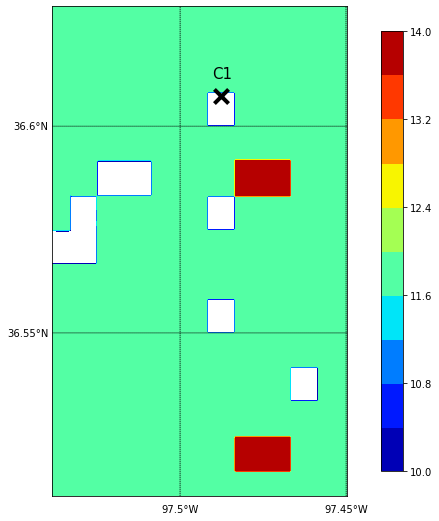

In [87]:
lats, lons = wrf.latlon_coords(lu)

bm = wrf.get_basemap(lu)

fig = plt.figure(figsize=(12, 9))

# bm.drawcoastlines(linewidth=0.25)
bm.drawstates(linewidth=0.25)
bm.drawcountries(linewidth=0.25)

bm.drawparallels(np.arange(36, 37, 0.05), labels=[1, 0, 0, 0])
bm.drawmeridians(np.arange(-98, -97, 0.05), labels=[0, 0, 0, 1])

x, y = bm(wrf.to_np(lons), wrf.to_np(lats))

# bm.contour(x, y, wrf.to_np(var), 10, colors="black")
bm.contourf(x, y, wrf.to_np(lu), 10, cmap=get_cmap('jet'))

clb = plt.colorbar(shrink=0.9)
# clb.ax.set_title(var.units, pad=12)

c1x, c1y = bm(wrf.to_np(-97.487643), wrf.to_np(36.607322))
bm.scatter(c1x, c1y, s=200, marker='x', color='k', linewidth=4)

c1x, c1y = bm(wrf.to_np(-97.4905), wrf.to_np(36.6115))
plt.annotate('C1', xy=(c1x, c1y), size=15)

# plt.title(wrf_run+'\n'+var_1time.description+' @ '+str(pd.Timestamp(var_1time['Time'].values)))

plt.show()

In [35]:
wswd = wrf.getvar(wrf_single, 'wspd_wdir', timeidx=wrf.ALL_TIMES)

In [42]:
hgt = wrf.getvar(wrf_single, 'height_agl', timeidx=wrf.ALL_TIMES)
hgt[0, :, :, :].mean(dim=['south_north', 'west_east'])[20]

In [60]:
hgt[0, :, :, :].mean(dim=['south_north', 'west_east'])[20]

<xarray.DataArray 'height_agl' ()>
array(99.570435, dtype=float32)
Coordinates:
    XTIME    float32 2.04e+03
    Time     datetime64[ns] 2018-08-05T22:00:00

In [63]:
np.round(hgt[0, :, :, :].mean(dim=['south_north', 'west_east'])[20].values, 2)

99.57

In [41]:
wswd['wspd_wdir' == 'wspd']

<xarray.DataArray 'wspd_wdir' (Time: 6, bottom_top: 108, south_north: 330, west_east: 200)>
array([[[[ 3.8705356,  3.5498264,  3.729425 , ...,  4.7248354,
           4.4430456,  4.2976847],
         [ 3.8588343,  3.2310677,  3.4014912, ...,  4.7480655,
           4.5012026,  4.357338 ],
         [ 3.7952995,  3.5067756,  3.5702975, ...,  4.3574166,
           4.3924837,  4.391114 ],
         ...,
         [ 2.3575618,  2.079645 ,  1.9269799, ...,  2.4190388,
           2.3493588,  2.4383967],
         [ 2.4332314,  2.1602144,  2.1008415, ...,  2.5374248,
           2.4348478,  2.4640281],
         [ 2.5108907,  2.2227943,  2.1367476, ...,  2.6976538,
           2.6138754,  2.5917037]],

        [[ 5.0415707,  5.1741095,  5.779689 , ...,  5.9150305,
           5.837965 ,  5.689294 ],
         [ 5.045551 ,  5.047611 ,  5.798314 , ...,  5.998372 ,
           5.9134736,  5.7033443],
         [ 5.039332 ,  4.992896 ,  5.3318777, ...,  5.8880944,
           5.8644705,  5.7472634],
...
         [10.214731 , 10.213899 , 10.211783 , ..., 10.008541 ,
          10.009336 , 10.008082 ],
         [10.216851 , 10.216206 , 10.213971 , ..., 10.009813 ,
          10.009584 , 10.008396 ],
         [10.2170925, 10.215658 , 10.214306 , ..., 10.010242 ,
          10.009451 , 10.0090275]],

        [[14.585283 , 14.591129 , 14.591405 , ..., 14.786691 ,
          14.785126 , 14.785245 ],
         [14.580567 , 14.586523 , 14.585622 , ..., 14.786879 ,
          14.785698 , 14.786548 ],
         [14.577897 , 14.579668 , 14.581297 , ..., 14.786846 ,
          14.785121 , 14.785958 ],
         ...,
         [13.975302 , 13.97202  , 13.972725 , ..., 14.392135 ,
          14.395523 , 14.402635 ],
         [13.978477 , 13.977462 , 13.976943 , ..., 14.389719 ,
          14.388475 , 14.401385 ],
         [13.9753685, 13.975112 , 13.975655 , ..., 14.395387 ,
          14.393958 , 14.401071 ]]]], dtype=float32)
Coordinates:
    wspd_wdir  <U4 'wspd'
    XLONG      (south_north, west_east) float32 -97.54 -97.54 ... -97.45 -97.45
    XLAT       (south_north, west_east) float32 36.51 36.51 ... 36.63 36.63
    XTIME      (Time) float32 2.04e+03 2.05e+03 2.06e+03 ... 2.08e+03 2.09e+03
  * Time       (Time) datetime64[ns] 2018-08-05T22:00:00 ... 2018-08-05T22:50:00
Dimensions without coordinates: bottom_top, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  wspd,wdir in projection space
    units:        m s-1
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-97.48758697509766, moad_cen_lat...

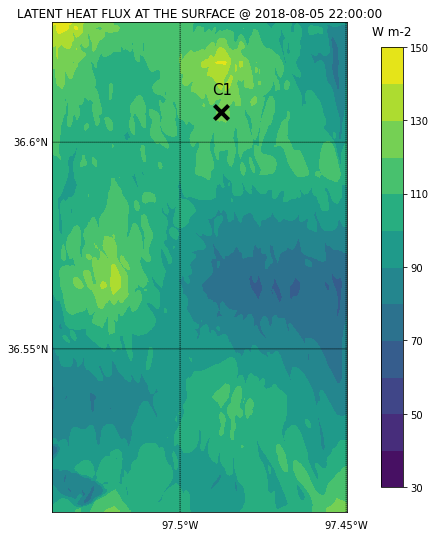

In [118]:
file = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/l1_0805m/auxout/'+'mmc_d04_2018-08-05_22:00:00'

def plot_contour(file, var, ):

    wrf_single = Dataset(file, 'r')

    lh = wrf.getvar(wrf_single, 'LH', timeidx=wrf.ALL_TIMES)

    # 1st time step
    lh_1time = lh[0,:,:]

    lats, lons = wrf.latlon_coords(lh)

    bm = wrf.get_basemap(lh_1time)

    fig = plt.figure(figsize=(12, 9))

    # bm.drawcoastlines(linewidth=0.25)
    bm.drawstates(linewidth=0.25)
    bm.drawcountries(linewidth=0.25)

    bm.drawparallels(np.arange(36, 37, 0.05), labels=[1, 0, 0, 0])
    bm.drawmeridians(np.arange(-98, -97, 0.05), labels=[0, 0, 0, 1])

    x, y = bm(wrf.to_np(lons), wrf.to_np(lats))

    # bm.contour(x, y, wrf.to_np(lh), 10, colors="black")
    bm.contourf(x, y, wrf.to_np(lh_1time), 10, cmap=get_cmap('viridis'))

    clb = plt.colorbar(shrink=0.9)
    clb.ax.set_title(lh.units, pad=12)

    c1x, c1y = bm(wrf.to_np(-97.487643), wrf.to_np(36.607322))
    bm.scatter(c1x, c1y, s=200, marker='x', color='k', linewidth=4)

    c1x, c1y = bm(wrf.to_np(-97.4905), wrf.to_np(36.6115))
    plt.annotate('C1', xy=(c1x, c1y), size=15)

    plt.title(lh_1time.description+' @ '+str(pd.Timestamp(lh_1time['Time'].values)))

    plt.show()